# Project Pythia Notebook Template

Let's start here! If you can directly link to an image relevant to your notebook, such as [canonical logos](https://github.com/numpy/numpy/blob/main/doc/source/_static/numpylogo.svg), do so here at the top of your notebook. You can do this with MyST Markdown syntax, outlined in [this MyST guide](https://mystmd.org/guide/figures), or you edit this cell to see a demonstration. **Be sure to include `alt` text for any embedded images to make your content more accessible.**

```{image} ../thumbnails/thumbnail.png
:alt: Project Pythia logo
:width: 200px
```

Next, title your notebook appropriately with a top-level Markdown header, `#` (see the very first cell above). Do not use this level header anywhere else in the notebook. Our book build process will use this title in the navbar, table of contents, etc. Keep it short, keep it descriptive. 

Follow this with a `---` cell to visually distinguish the transition to the prerequisites section.

---

## Overview
If you have an introductory paragraph, lead with it here! Keep it short and tied to your material, then be sure to continue into the required list of topics below,

1. This is a numbered list of the specific topics
1. These should map approximately to your main sections of content
1. Or each second-level, `##`, header in your notebook
1. Keep the size and scope of your notebook in check
1. And be sure to let the reader know up front the important concepts they'll be leaving with

## Prerequisites
This section was inspired by [this template](https://github.com/alan-turing-institute/the-turing-way/blob/master/book/templates/chapter-template/chapter-landing-page.md) of the wonderful [The Turing Way](https://the-turing-way.netlify.app) Jupyter Book.

Following your overview, tell your reader what concepts, packages, or other background information they'll **need** before learning your material. Tie this explicitly with links to other pages here in Foundations or to relevant external resources. Remove this body text, then populate the Markdown table, denoted in this cell with `|` vertical brackets, below, and fill out the information following. In this table, lay out prerequisite concepts by explicitly linking to other Foundations material or external resources, or describe generally helpful concepts.

Label the importance of each concept explicitly as **helpful/necessary**.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy) | Necessary | |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf) | Helpful | Familiarity with metadata structure |
| Project management | Helpful | |

- **Time to learn**: estimate in minutes. For a rough idea, use 5 mins per subsection, 10 if longer; add these up for a total. Safer to round up and overestimate.
- **System requirements**:
    - Populate with any system, version, or non-Python software requirements if necessary
    - Otherwise use the concepts table above and the Imports section below to describe required packages as necessary
    - If no extra requirements, remove the **System requirements** point altogether

---

## Imports
Begin your body of content with another `---` divider before continuing into this section, then remove this body text and populate the following code cell with all necessary Python imports **up-front**:

In [1]:
!conda install metpy -y -c conda-forge

/srv/conda/envs/notebook/lib/python3.12/site-packages/conda/base/context.py:211: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.9. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
Channels:
 - conda-forge
 - defaults
Platform: linux-64
donege metadata (repodata.json): - 
doneenvironment: \ 

# All requested packages already installed.



In [2]:
import ipywidgets as widgets
import requests
import s3fs
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import datetime
import numpy.ma as ma
from metpy.plots import ctables
import urllib.request
import gzip
import tempfile

## MRMS Data

In [30]:
# Using MRMS Data to plot the low level composite reflectivity at 12Z in Central Texas

### Reading in MRMS Data

In [3]:
response = urllib.request.urlopen("https://noaa-mrms-pds.s3.amazonaws.com/CONUS/LayerCompositeReflectivity_Low_00.50/20250704/MRMS_LayerCompositeReflectivity_Low_00.50_20250704-001040.grib2.gz")
compressed_file = response.read()

with tempfile.NamedTemporaryFile(suffix=".grib2") as f:
            f.write(gzip.decompress(compressed_file))
            data_in = xr.load_dataarray(f.name, engine='cfgrib', decode_timedelta=True)

ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(40) ignored
ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(40) ignored


## Plotting Reflectivity over Texas at 12Z

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from metpy.plots import ctables

In [18]:
refl_norm, refl_cmap = ctables.registry.get_with_steps('NWSReflectivity', 5, 5)

# 2. Extract coords & data
lons = data_in.longitude.values
lats = data_in.latitude.values
refl = data_in.values

# If coords are 1D, make them 2D
if lons.ndim == 1 and lats.ndim == 1:
    lons, lats = np.meshgrid(lons, lats)

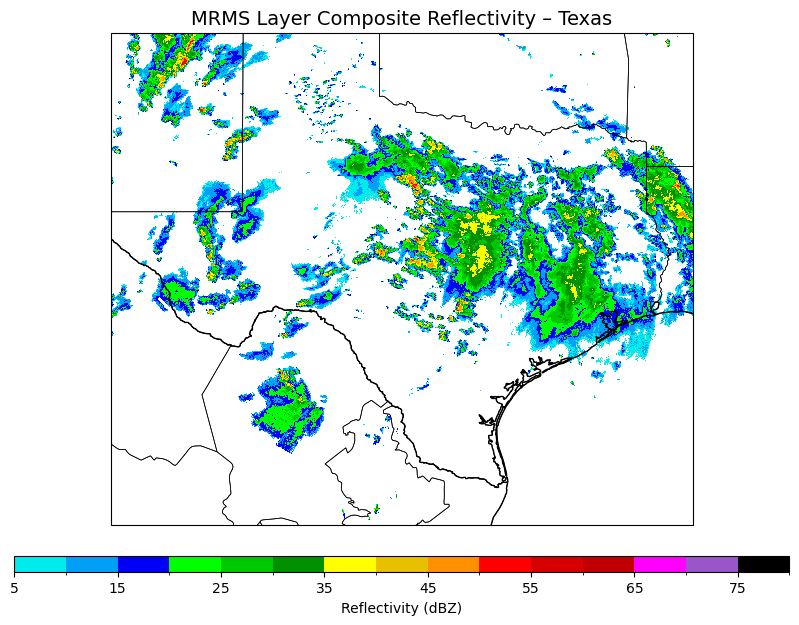

In [29]:
# 3. Plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-106, -93, 25, 36], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.STATES, linewidth=0.5)

mesh = ax.pcolormesh(
    lons, lats, ma.masked_where(refl<5,refl),
    cmap=refl_cmap,
    norm=refl_norm,
    transform=ccrs.PlateCarree()
)

cb = plt.colorbar(mesh, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cb.set_label('Reflectivity (dBZ)')

plt.title('MRMS Layer Composite Reflectivity – Texas', fontsize=14)
plt.show()


In [28]:
ma.masked_where(refl<5,refl)

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=np.float64(1e+20),
  dtype=float32)

### A content subsection
Divide and conquer your objectives with Markdown subsections, which will populate the helpful navbar in Jupyter Lab and here on the Jupyter Book!

In [ ]:
# some subsection code
a = [1, 2, 3, 4, 5]
[i + 2 for i in a]

### Another content subsection
Keep up the good work! A note, *try to avoid using code comments as narrative*, and instead let them only exist as brief clarifications where necessary.

## Your second content section
Here we can move on to our second objective, and we can demonstrate...

### A subsection to the second section

#### a quick demonstration

##### of further and further

###### header levels

as well as $m = a * t / h$ text! Similarly, you have access to other $\LaTeX$ equation [**functionality**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) via MathJax:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

Check out [**any number of helpful Markdown resources**](https://www.markdownguide.org/basic-syntax/) for further customizing your notebooks and the [**MyST Syntax Overview**](https://mystmd.org/guide/syntax-overview) for MyST-specific formatting information. Don't hesitate to ask questions if you have problems getting it to look *just right*.

## Last Section

You can add [admonitions using MyST syntax](https://mystmd.org/guide/admonitions):

:::{note}
Your relevant information here!
:::

Some other admonitions you can put in ([there are 10 total](https://mystmd.org/guide/admonitions#admonitions-list)):

:::{hint}
A helpful hint.
:::

:::{warning}
Be careful!
:::

:::{danger}
Scary stuff be here.
:::

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!